### Questions to Answer during analysis :
- To find out which customer should be given loan again.
- To find out from the existing current loan status who will default the loan.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
pd.set_option("display.max_rows",111)
pd.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("E:/New/loan.csv")

# Data Wrangling :

### Showing first 5 rows from dataset :

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Showing last 5 rows from dataset :

In [4]:
df.tail() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Finding Null Values :

In [5]:
df.isnull().isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                              0
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Picking all useful variables from actual dataset for analysis : 

In [6]:
Data=df.loc[:,['id','member_id','loan_amnt','term','int_rate','installment','emp_length','home_ownership','annual_inc','verification_status','loan_status',"mths_since_last_delinq","chargeoff_within_12_mths","delinq_2yrs"]]
Data

,id,member_id,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,mths_since_last_delinq,chargeoff_within_12_mths,delinq_2yrs
0,1077501,1296599,5000,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,NaN,0.0,0
1,1077430,1314167,2500,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,NaN,0.0,0
2,1077175,1313524,2400,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,NaN,0.0,0
3,1076863,1277178,10000,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,35.0,0.0,0
4,1075358,1311748,3000,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Current,38.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,36 months,8.07%,78.42,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,0.0,NaN,0
39713,90665,90607,8500,36 months,10.28%,275.38,3 years,RENT,18000.0,Not Verified,Fully Paid,5.0,NaN,1
39714,90395,90390,5000,36 months,8.07%,156.84,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,0.0,NaN,0
39715,90376,89243,5000,36 months,7.43%,155.38,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,0.0,NaN,0


In [7]:
pd.DataFrame() # Creates Null Dataframe

""


In [8]:
data_new = pd.DataFrame(Data)
data_new

,id,member_id,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,mths_since_last_delinq,chargeoff_within_12_mths,delinq_2yrs
0,1077501,1296599,5000,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,NaN,0.0,0
1,1077430,1314167,2500,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,NaN,0.0,0
2,1077175,1313524,2400,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,NaN,0.0,0
3,1076863,1277178,10000,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,35.0,0.0,0
4,1075358,1311748,3000,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Current,38.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,36 months,8.07%,78.42,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,0.0,NaN,0
39713,90665,90607,8500,36 months,10.28%,275.38,3 years,RENT,18000.0,Not Verified,Fully Paid,5.0,NaN,1
39714,90395,90390,5000,36 months,8.07%,156.84,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,0.0,NaN,0
39715,90376,89243,5000,36 months,7.43%,155.38,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,0.0,NaN,0


In [9]:
data_new.shape

(39717, 14)

In [10]:
temp = pd.DataFrame(round((data_new.isnull().sum()/len(data_new))*100,2),columns = ["missing"])
temp

,missing
id,0.00
member_id,0.00
loan_amnt,0.00
term,0.00
int_rate,0.00
installment,0.00
emp_length,2.71
home_ownership,0.00
annual_inc,0.00
verification_status,0.00


In [11]:
missing_col = temp[temp["missing"] > 0]
missing_col

,missing
emp_length,2.71
mths_since_last_delinq,64.66
chargeoff_within_12_mths,0.14


### emp_length column :

In [12]:
pd.unique(data_new["emp_length"])

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [13]:
data_new.emp_length

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

### Cleaning emp_length column :

In [14]:
def clean(x):
    x=str(x) # converting value to string inside the x.
    if x != 'nan':
        y=0
        if '<' in x:
            y=0
        else:
            y=float(re.findall('\d+',x)[0]) # this re package has regx function \d+ which will take int from given variable set
    else:
        y=np.nan
    return y
 # This function will remove the string and give the float value

### Apply the function to the dataset 

In [15]:
data_new['emp_length'] = data_new['emp_length'].apply(clean) 

In [16]:
data_new['emp_length']

0        10.0
1         0.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 39717, dtype: float64

In [17]:
pd.unique(data_new["emp_length"])

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

### We can create groups according to the length of membership of the bank 

In [18]:
def createEmpGroup(x):
    if x in [0,1,2]:
        grp = '0-2'
    elif x in [3,4,5]:
        grp = '3-5'
    elif x in [6,7,8]:
        grp = '6-8'
    elif  x > 8 :
        grp = '9-above'
    else:      # This function remove missing value i.e nan and set them to None
        grp = 'None'
    return grp  

In [19]:
data_new["emp_length"] = data_new["emp_length"].apply(createEmpGroup)

In [20]:
pd.unique(data_new["emp_length"])

array(['9-above', '0-2', '3-5', '6-8', 'None'], dtype=object)

In [21]:
data_new.head()

,id,member_id,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,mths_since_last_delinq,chargeoff_within_12_mths,delinq_2yrs
0,1077501,1296599,5000,36 months,10.65%,162.87,9-above,RENT,24000.0,Verified,Fully Paid,NaN,0.0,0
1,1077430,1314167,2500,60 months,15.27%,59.83,0-2,RENT,30000.0,Source Verified,Charged Off,NaN,0.0,0
2,1077175,1313524,2400,36 months,15.96%,84.33,9-above,RENT,12252.0,Not Verified,Fully Paid,NaN,0.0,0
3,1076863,1277178,10000,36 months,13.49%,339.31,9-above,RENT,49200.0,Source Verified,Fully Paid,35.0,0.0,0
4,1075358,1311748,3000,60 months,12.69%,67.79,0-2,RENT,80000.0,Source Verified,Current,38.0,0.0,0


### mths_since_last_delinq column :

In [22]:
data_new[data_new["mths_since_last_delinq"].isnull()]["delinq_2yrs"]

0        0
1        0
2        0
5        0
6        0
        ..
39650    0
39659    0
39660    0
39686    0
39688    0
Name: delinq_2yrs, Length: 25682, dtype: int64

### This tells that no customer has deling since 2yrs 👇

In [23]:
pd.unique(data_new[data_new["mths_since_last_delinq"].isnull()]["delinq_2yrs"])

array([0], dtype=int64)

In [24]:
data_new['mths_since_last_delinq'].fillna('999',inplace=True)

In [25]:
pd.unique(data_new["mths_since_last_delinq"])

array(['999', 35.0, 38.0, 61.0, 8.0, 20.0, 18.0, 68.0, 45.0, 48.0, 41.0,
       40.0, 74.0, 25.0, 53.0, 39.0, 10.0, 26.0, 56.0, 77.0, 28.0, 52.0,
       24.0, 16.0, 60.0, 54.0, 23.0, 9.0, 11.0, 13.0, 65.0, 19.0, 80.0,
       22.0, 59.0, 79.0, 44.0, 64.0, 57.0, 14.0, 63.0, 49.0, 15.0, 73.0,
       70.0, 29.0, 51.0, 5.0, 75.0, 55.0, 2.0, 30.0, 47.0, 33.0, 69.0,
       4.0, 43.0, 21.0, 27.0, 46.0, 81.0, 78.0, 82.0, 31.0, 76.0, 62.0,
       72.0, 42.0, 50.0, 3.0, 12.0, 67.0, 36.0, 34.0, 58.0, 17.0, 71.0,
       66.0, 32.0, 6.0, 37.0, 7.0, 1.0, 83.0, 86.0, 115.0, 96.0, 103.0,
       120.0, 106.0, 89.0, 107.0, 85.0, 97.0, 95.0, 0.0], dtype=object)

In [26]:
temp = pd.DataFrame(round((data_new.isnull().sum()/len(data_new))*100,2),columns = ["missing"])
missing_col = temp[temp["missing"] > 0]
missing_col

,missing
chargeoff_within_12_mths,0.14


### chargeoff_within_12_mths column :

In [27]:
pd.unique(data_new["chargeoff_within_12_mths"])

array([ 0., nan])

In [28]:
data_new["chargeoff_within_12_mths"].fillna('0',inplace=True)

In [29]:
temp = pd.DataFrame(round((data_new.isnull().sum()/len(data_new))*100,2),columns = ["missing"])

In [30]:
missing_col = temp[temp["missing"] > 0]

In [31]:
missing_col

,missing


### So we have Cleaned the dataset so we can use it for analysis.

In [32]:
analysis = data_new

In [33]:
analysis.reset_index(inplace=True,drop=False)

In [34]:
emp_inc = analysis[["emp_length","annual_inc"]].groupby(["emp_length"]).mean()
emp_inc

,annual_inc
emp_length,
0-2,62201.312086
3-5,67159.013871
6-8,70226.465734
9-above,80809.031315
None,45986.791553


Text(0.5, 1.0, 'Chances of getting the loan on the basis on income')

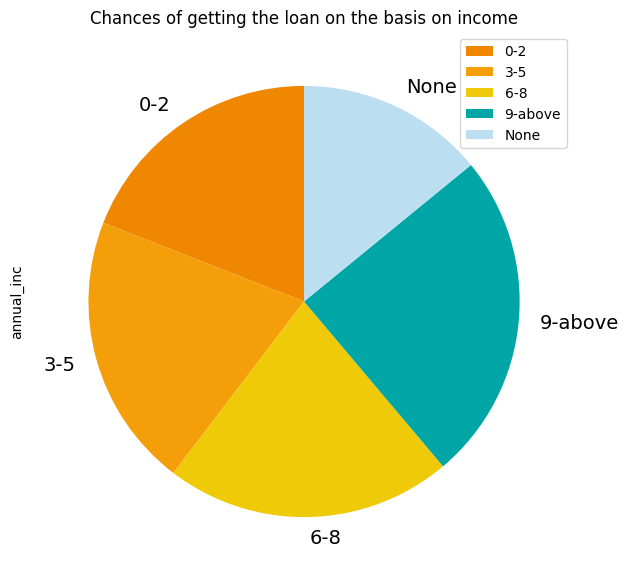

In [35]:
emp_inc.plot(kind = 'pie', subplots=True, figsize=(7, 7),startangle=90,colors = ["#f08700",'#f49f0a','#efca08','#00a6a6','#bbdef0'],textprops={'fontsize': 14})
plt.title("Chances of getting the loan on the basis on income")
# pie chart

**Insights :**
- Since we want to show the chances of getting loan out of 100% according to the annual income.
- According to annual income 9-above group have high chance of getting loan.

In [36]:
emp_inc.reset_index(inplace=True,drop=False)
emp_inc

,emp_length,annual_inc
0,0-2,62201.312086
1,3-5,67159.013871
2,6-8,70226.465734
3,9-above,80809.031315
4,None,45986.791553


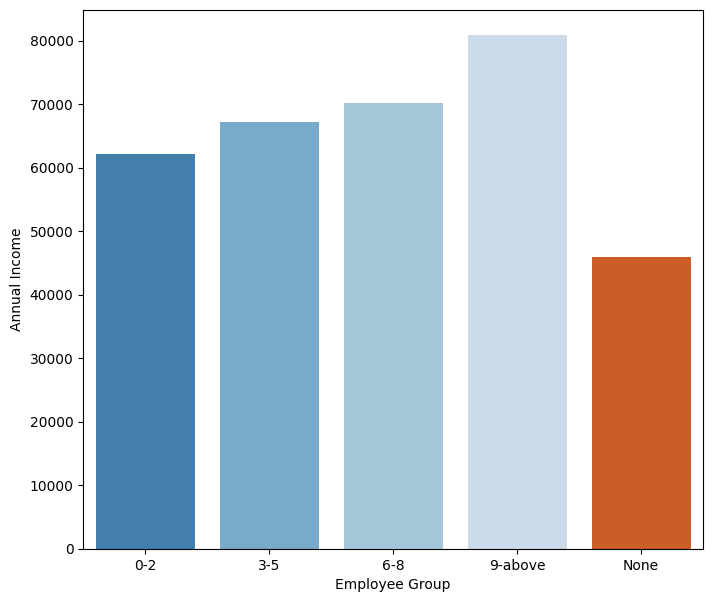

In [37]:
plt.figure(figsize=(8,7))
sns.barplot(data = emp_inc,x = "emp_length",y = "annual_inc",palette ='tab20c')
plt.xlabel('Employee Group')
plt.ylabel('Annual Income')
plt.show()

**Insights :**
- Longer the employment tenure higher the probability of loan repayment.
- Thus higher chance of getting loan

In [38]:
status = analysis[['emp_length','loan_status','index']].groupby(["emp_length","loan_status"]).count()
status = status.reset_index()
status

,emp_length,loan_status,index
0,0-2,Charged Off,1662
1,0-2,Current,243
2,0-2,Fully Paid,10306
3,3-5,Charged Off,1475
4,3-5,Current,265
5,3-5,Fully Paid,9073
6,6-8,Charged Off,773
7,6-8,Current,167
8,6-8,Fully Paid,4541
9,9-above,Charged Off,1489


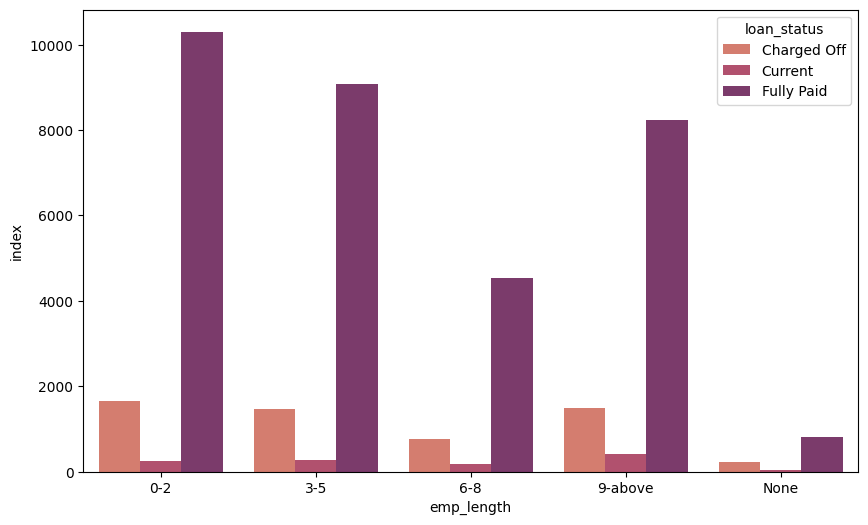

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data = status, x ="emp_length",y = "index",hue ="loan_status",palette ='flare')
plt.show()

**Insights :**
- Group of 0-2 years of employment length should be given loan again.
- Since they fully paid the previous loan.

In [40]:
emp_inc = analysis[["annual_inc","loan_amnt"]].groupby(["annual_inc"]).mean()

In [41]:
emp_inc

,loan_amnt
annual_inc,
4000.0,2000.0
4080.0,1400.0
4200.0,1975.0
4800.0,1850.0
4888.0,1400.0
...,...
1782000.0,12025.0
1900000.0,1500.0
2039784.0,8450.0


In [42]:
analysis['annual_inc'].unique

<bound method Series.unique of 0         24000.0
1         30000.0
2         12252.0
3         49200.0
4         80000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 39717, dtype: float64>

In [43]:
def incomegrp(x):
    if x < 40000:
        grp = "< 40K"
    elif x == 40000:
        grp = "40K"
    elif x > 40000 and x <= 1200000:
        grp = "40K-12L"
    elif x > 1200000 and x <= 2400000:
        grp = "12L-24L"
    elif x > 2400000 and x <= 3600000:
        grp = "24L-36L"
    elif x > 3600000 and x <= 4800000:
        grp = "36L-48L"
    elif x > 4800000 and x <= 6000000:
        grp = "48L-60L"
    else:
        grp = "None"
    return grp

In [44]:
analysis['annual_inc'] = analysis['annual_inc'].apply(incomegrp)

In [45]:
analysis.head()

,index,id,member_id,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,mths_since_last_delinq,chargeoff_within_12_mths,delinq_2yrs
0,0,1077501,1296599,5000,36 months,10.65%,162.87,9-above,RENT,< 40K,Verified,Fully Paid,999,0.0,0
1,1,1077430,1314167,2500,60 months,15.27%,59.83,0-2,RENT,< 40K,Source Verified,Charged Off,999,0.0,0
2,2,1077175,1313524,2400,36 months,15.96%,84.33,9-above,RENT,< 40K,Not Verified,Fully Paid,999,0.0,0
3,3,1076863,1277178,10000,36 months,13.49%,339.31,9-above,RENT,40K-12L,Source Verified,Fully Paid,35.0,0.0,0
4,4,1075358,1311748,3000,60 months,12.69%,67.79,0-2,RENT,40K-12L,Source Verified,Current,38.0,0.0,0


In [46]:
loan = analysis[['loan_status','annual_inc','loan_amnt']].groupby(["annual_inc","loan_status"]).mean()

In [47]:
loan = loan.reset_index()
loan

,annual_inc,loan_status,loan_amnt
0,12L-24L,Charged Off,15775.000000
1,12L-24L,Fully Paid,6995.000000
2,36L-48L,Fully Paid,25000.000000
3,40K,Charged Off,9934.294872
4,40K,Current,13907.142857
5,40K,Fully Paid,8401.216023
6,40K-12L,Charged Off,14142.380645
7,40K-12L,Current,18276.222685
8,40K-12L,Fully Paid,12150.176028
9,48L-60L,Fully Paid,5000.000000


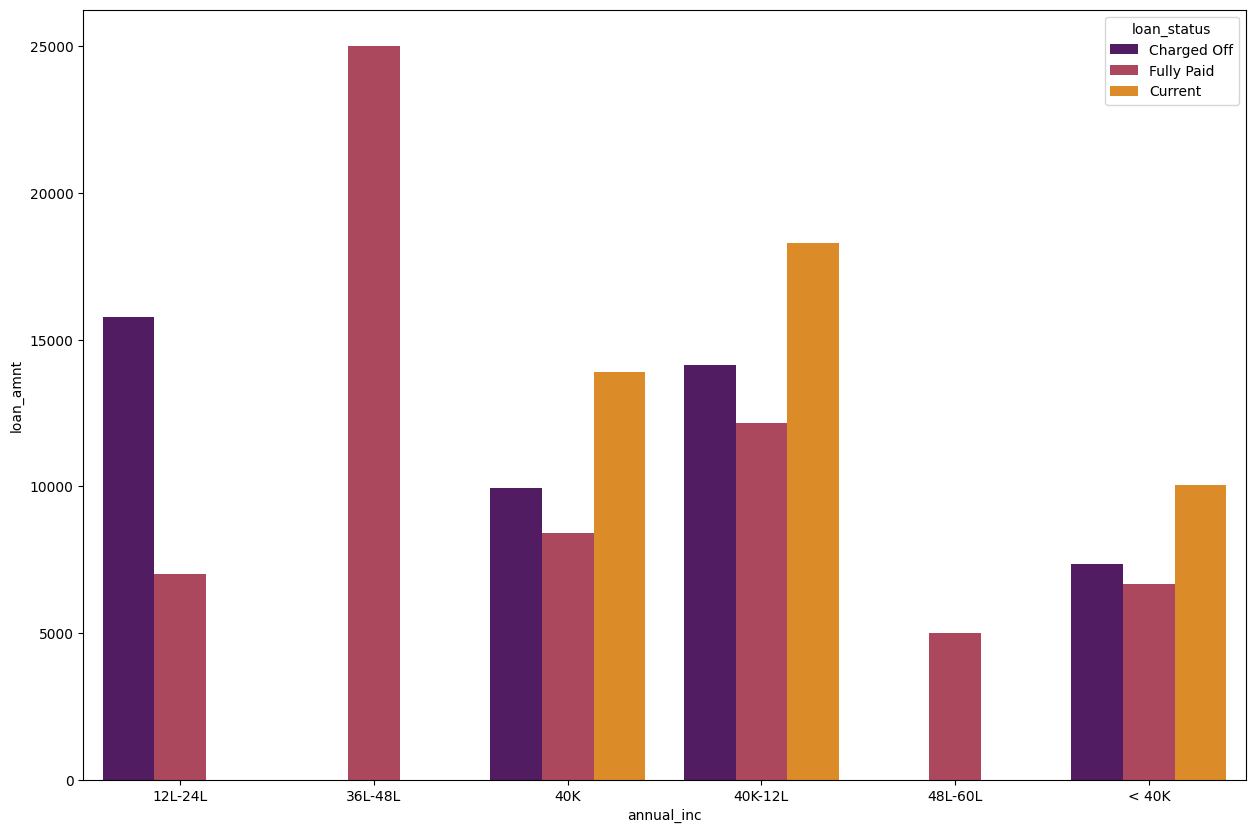

In [48]:
plt.figure(figsize=(15,10))
sns.barplot(data = loan, x ="annual_inc",y = "loan_amnt",hue ="loan_status",palette ='inferno')
plt.show()

**Conclusion :**
- From the analysis we say that, from the past performance of the payee the chances of getting loan increases.
- The group of 0-2 year of employment length will have low risk of getting defaulter and also get chance of getting another loan.
- Their is no chance of getting into defaulter since their loan processing is under progress.